<a href="https://colab.research.google.com/github/mixa15341/Data_Minimg/blob/main/6/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((140, 4), (10, 4))

#### 1.2. Обучите модель KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [4]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_pred)
accuracy


1.0

#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [5]:
def train_knn_with(n_neighbours: int, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [6]:
import numpy as np
results = pd.DataFrame(columns=['k', 'Точность'])

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results = pd.concat([results, pd.DataFrame({'k': [k], 'Точность': [accuracy]})], ignore_index=True)

<ipython-input-6-d3b570be0883>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'k': [k], 'Точность': [accuracy]})], ignore_index=True)


In [7]:
  results

,k,Точность
0,1,0.9
1,2,0.9
2,3,0.9
3,4,0.9
4,5,0.9
...,...,...
94,95,0.6
95,96,0.6
96,97,0.6
97,98,0.6


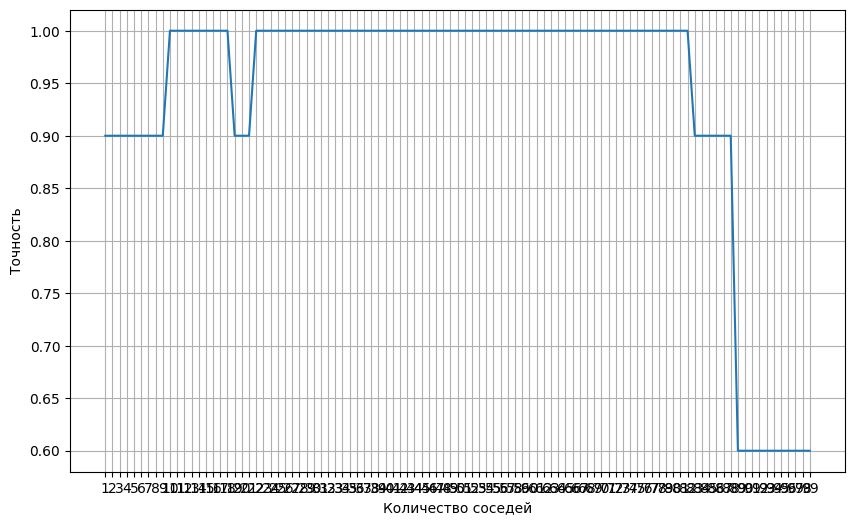

Наилучшее значение k: 10
Максимальная точность: 1.00


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['Точность'])
plt.xticks(range(1, 100))
plt.grid(True)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.show()

best_k = results.loc[results['Точность'].idxmax()]['k']
best_accuracy = results['Точность'].max()

print(f"Наилучшее значение k: {best_k}")
print(f"Максимальная точность: {best_accuracy:.2f}")

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [9]:
from sklearn.metrics import pairwise_distances

point1 = [5, 0, 2]
point2 = [2, 7, 2]

p = 2

for p in range(-2, 10):
    distance = pairwise_distances([point1], [point2], metric='minkowski', p=p)
    print(f'Расстояние Минковского (p={p}): {distance[0][0]}')

Расстояние Минковского (p=-2): 0.0
Расстояние Минковского (p=-1): 0.0
Расстояние Минковского (p=0): inf
Расстояние Минковского (p=1): 10.0
Расстояние Минковского (p=2): 7.615773105863909
Расстояние Минковского (p=3): 7.179054352068318
Расстояние Минковского (p=4): 7.058305379361579
Расстояние Минковского (p=5): 7.0201255082243295
Расстояние Минковского (p=6): 7.007210536682955
Расстояние Минковского (p=7): 7.00265258162485
Расстояние Минковского (p=8): 7.0009953541340835
Расстояние Минковского (p=9): 7.000379289075169


In [10]:
import numpy as np

# Генерируем два случайных индекса из X_test
random_indices = np.random.choice(len(X_test), size=2, replace=False)

# Извлекаем соответствующие объекты из X_test
random_objects = X_test.iloc[random_indices]

# Исключаем строку заголовка (header)
random_objects = random_objects.values

#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [11]:
distances = pairwise_distances(X_train, random_objects, metric='minkowski', p=2)
distances

array([[1.61554944, 1.01488916],
       [2.12132034, 1.12249722],
       [0.82462113, 0.89442719],
       [2.46170673, 3.55808937],
       [2.78208555, 3.61939221],
       [3.07408523, 1.60934769],
       [2.07846097, 1.18321596],
       [2.61533937, 3.86264158],
       [2.69443872, 3.55246393],
       [2.71477439, 3.73496988],
       [3.51852242, 2.00499377],
       [2.90688837, 1.58429795],
       [2.1       , 0.81853528],
       [2.28035085, 3.30454233],
       [1.59687194, 0.85440037],
       [2.64764046, 3.76696164],
       [1.42126704, 0.9486833 ],
       [1.2083046 , 0.86023253],
       [2.39374184, 0.81853528],
       [4.71274867, 3.21091887],
       [2.16101828, 0.7       ],
       [1.72626765, 0.6164414 ],
       [3.38969025, 1.83030052],
       [2.40831892, 1.4832397 ],
       [2.23606798, 0.87177979],
       [2.57875939, 3.72961124],
       [3.26036808, 1.86815417],
       [3.40293991, 1.96468827],
       [4.57165178, 3.04959014],
       [3.01164407, 1.57797338],
       [2.

#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [14]:
import numpy as np
import itertools

k = 3

# Инициализируем список для хранения индексов ближайших соседей для каждого объекта
top_k_neighbors = []

# Перебираем каждый объект из random_objects
for i in range(len(random_objects)):
    neighbor_indices = np.argsort(distances[:, i])
    k_neighbors = neighbor_indices[1:k+1]
    top_k_neighbors.append(k_neighbors)


for i, neighbors in enumerate(top_k_neighbors):
    print(f"Ближайшие соседи для объекта {i + 1}:")
    for j, neighbor_index in enumerate(neighbors):
        neighbor_values = X_train.iloc[neighbor_index]
        print(f"Сосед {j + 1}: {neighbor_values}")
    print()


Ближайшие соседи для объекта 1:
Сосед 1: sepal length (cm)    4.9
sepal width (cm)     2.4
petal length (cm)    3.3
petal width (cm)     1.0
Name: 57, dtype: float64
Сосед 2: sepal length (cm)    5.5
sepal width (cm)     2.4
petal length (cm)    3.7
petal width (cm)     1.0
Name: 81, dtype: float64
Сосед 3: sepal length (cm)    5.5
sepal width (cm)     2.4
petal length (cm)    3.8
petal width (cm)     1.1
Name: 80, dtype: float64

Ближайшие соседи для объекта 2:
Сосед 1: sepal length (cm)    6.0
sepal width (cm)     2.2
petal length (cm)    4.0
petal width (cm)     1.0
Name: 62, dtype: float64
Сосед 2: sepal length (cm)    6.5
sepal width (cm)     2.8
petal length (cm)    4.6
petal width (cm)     1.5
Name: 54, dtype: float64
Сосед 3: sepal length (cm)    6.2
sepal width (cm)     2.9
petal length (cm)    4.3
petal width (cm)     1.3
Name: 97, dtype: float64



#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

<ipython-input-15-abc3ad55504b>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


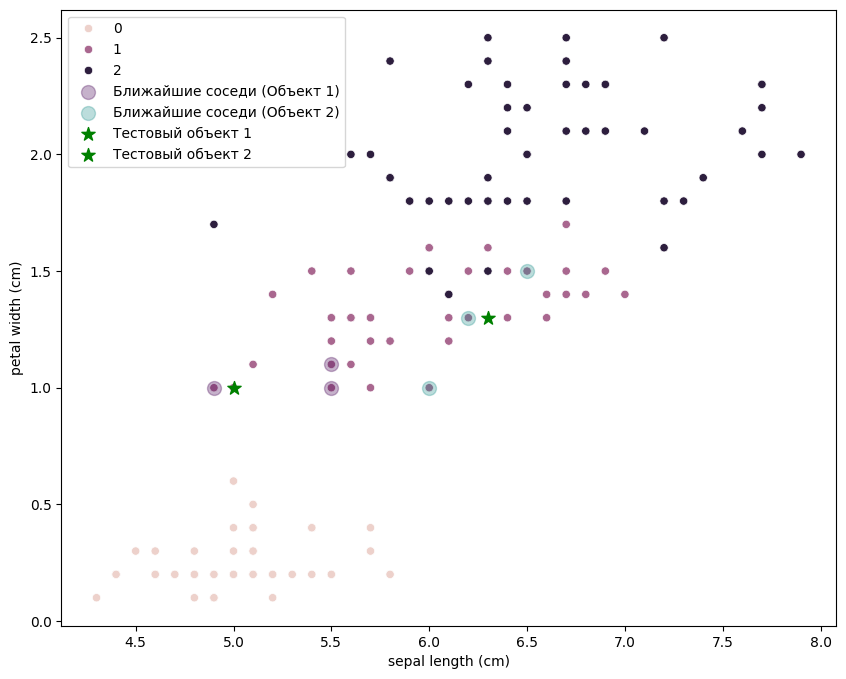

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_train['sepal length (cm)'],
    y=X_train['petal width (cm)'],
    hue=y_train
)

for i, neighbor_indices in enumerate(top_k_neighbors):
    # Выбираем уникальный цвет для каждого объекта из random_objects
    color = plt.cm.viridis(i / len(random_objects))  # Используем colormap для выбора цвета
    plt.scatter(
        X_train.iloc[neighbor_indices]['sepal length (cm)'],
        X_train.iloc[neighbor_indices]['petal width (cm)'],
        c=color,
        alpha=0.3,
        marker='o',
        s=100,
        label=f'Ближайшие соседи (Объект {i + 1})'
    )

for i in range(len(random_objects)):
    plt.scatter(
        random_objects[i, 0],
        random_objects[i, 3],
        c='g',
        marker='*',
        s=100,
        label=f'Тестовый объект {i + 1}'
    )
plt.legend()
plt.show()


#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
# Ваш код здесь


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape,  X_test.shape


((18576, 8), (2064, 8))

Затем нормализуйте данные:

In [32]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse}")
print(f"R^2 (Коэффициент детерминации): {r2}")


Среднеквадратическая ошибка: 0.4247012611417403
R^2 (Коэффициент детерминации): 0.6815399810636454


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [35]:
def train_knn_with(n_neighbours: int, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [36]:
import numpy as np
results = pd.DataFrame(columns=['k', 'Среднеквадратическая ошибка', 'Коэффициент детерминации'])

for k in range(1, 100):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = pd.concat([results, pd.DataFrame({'k': [k], 'Среднеквадратическая ошибка': [mse], 'Коэффициент детерминации':[r2] })], ignore_index=True)

<ipython-input-36-a20f3ba30eb2>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'k': [k], 'Среднеквадратическая ошибка': [mse], 'Коэффициент детерминации':[r2] })], ignore_index=True)


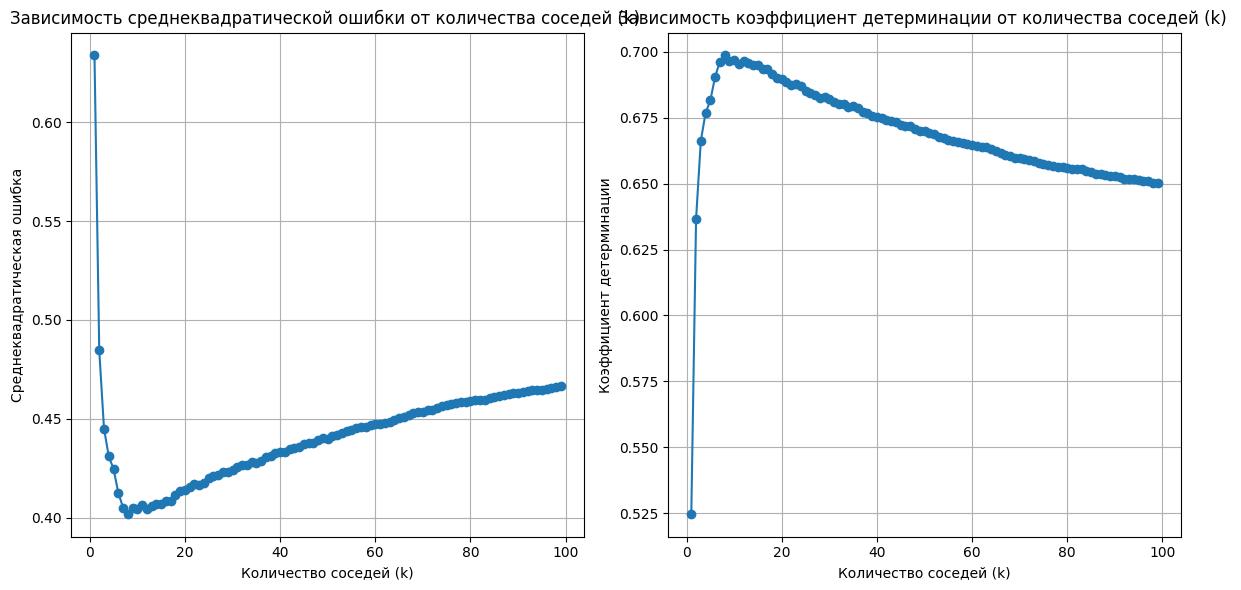

In [37]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results['k'], results['Среднеквадратическая ошибка'], marker='o')
plt.title('Зависимость среднеквадратической ошибки от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратическая ошибка')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results['k'], results['Коэффициент детерминации'], marker='o')
plt.title('Зависимость коэффициент детерминации от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Коэффициент детерминации')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [38]:
import numpy as np

random_objects = X_test.sample(n=2)
random_objects


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1747,0.089930,0.803922,0.019123,0.018748,0.025141,0.002197,0.555319,0.215139
706,0.195101,0.745098,0.033562,0.028367,0.040528,0.002287,0.407447,0.293825


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [39]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows():
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True).head(10)


,object_idx,train_idx,dst
24224,706,5647,0.047251
22008,706,3431,0.048477
24691,706,6114,0.056500
25449,706,6872,0.058516
25302,706,6725,0.065883
34818,706,16241,0.069352
33239,706,14662,0.072834
31812,706,13235,0.073911
20550,706,1973,0.076110
32916,706,14339,0.080131


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [40]:
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx']==test_idx].sort_values(['dst']).head(10))


       object_idx  train_idx       dst
17978        1747      17977  0.014781
9976         1747       9975  0.014867
7783         1747       7782  0.023346
5500         1747       5499  0.023502
4079         1747       4078  0.024312
15221        1747      15220  0.025530
1945         1747       1944  0.025773
13229        1747      13228  0.025861
7333         1747       7332  0.026180
16737        1747      16736  0.027993
       object_idx  train_idx       dst
24224         706       5647  0.047251
22008         706       3431  0.048477
24691         706       6114  0.056500
25449         706       6872  0.058516
25302         706       6725  0.065883
34818         706      16241  0.069352
33239         706      14662  0.072834
31812         706      13235  0.073911
20550         706       1973  0.076110
32916         706      14339  0.080131


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [41]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

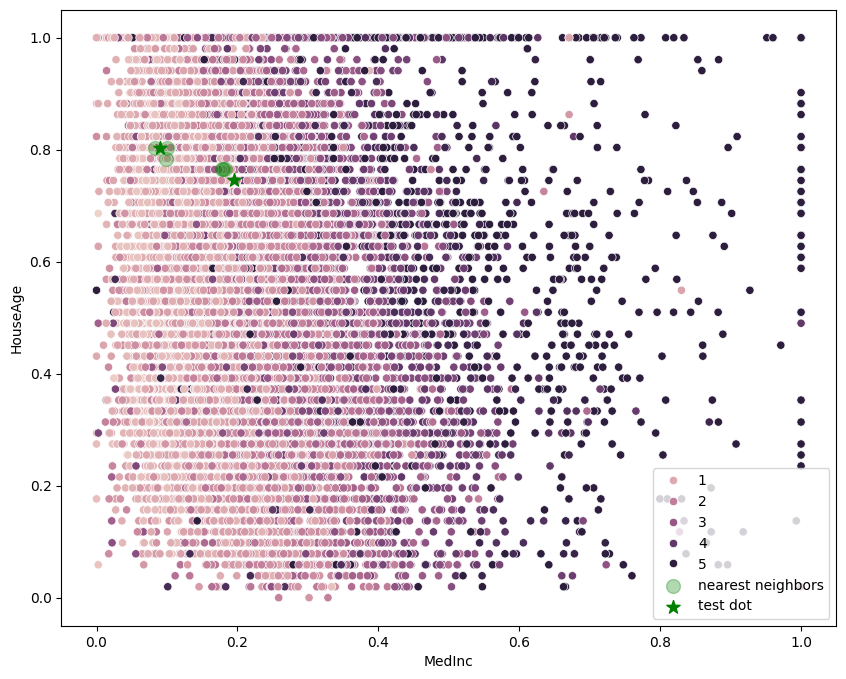

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(
    X_train.iloc[:,0].loc[nearest_neigbors_idxs],
    X_train.iloc[:,1].loc[nearest_neigbors_idxs],
    c='g',
    alpha=0.3,
    marker='o',
    s=100,
    label='nearest neighbors'
)

plt.scatter(
    test_points_X,
    test_points_Y,
    c='g',
    marker='*',
    s=100,
    label='test dot'
)
plt.legend()


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [43]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [45]:
X_selected = X[['sepal length (cm)', 'petal width (cm)']]
X_selected.head()


,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### Визуализируйте ваши данные на графике

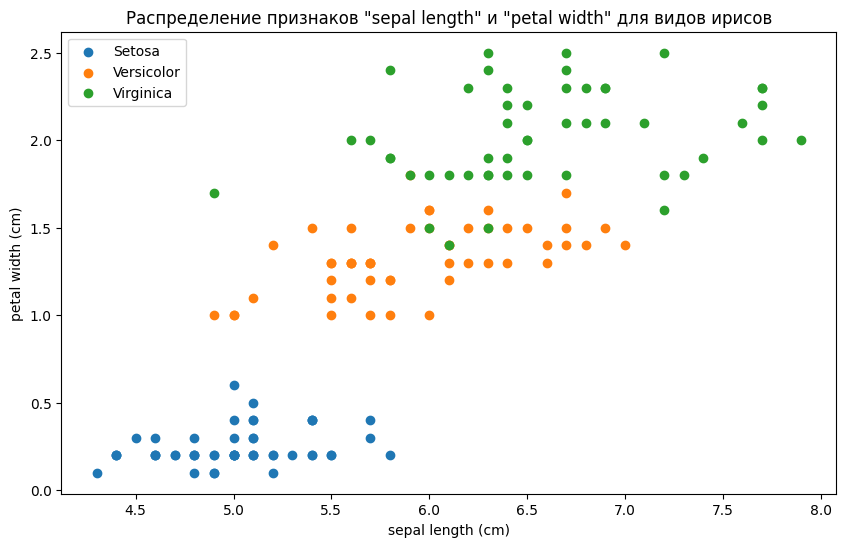

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.scatter(
        X_selected[y == i]['sepal length (cm)'],
        X_selected[y == i]['petal width (cm)'],
        label=f'Iris {i}'
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Распределение признаков "sepal length" и "petal width" для видов ирисов')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

plt.show()


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.10, random_state=42)

print(X_train.shape, X_test.shape)


(135, 2) (15, 2)


#### 1.2. Обучите модель KNN на 50 соседях

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [49]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Точность модели KNN:", accuracy)


Точность модели KNN: 0.9333333333333333


#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [50]:
from sklearn.metrics import pairwise_distances

random_test_object = X_test.sample(n=1, random_state=42)

distances = pairwise_distances(random_test_object, X_train, metric='euclidean')


#### 1.5. Выберите топ  k  соседей


In [51]:
import numpy as np
k = 50
neighbor_indices = np.argsort(distances[0])
k_neighbors = neighbor_indices[1:k+1]

print(f"Индексы ближайших соседей:", k_neighbors)


Индексы ближайших соседей: [ 51 123  35   3  40  49 110   2 103  59 108 101 130  80  62  68  30  83
 105  78  94  37  54  26  77  60 125  88  31 128  74 126  57 104   0   6
  21  25  58  75  96  95 122  45 107  16  55  64  44 127]


#### 1.6. Выведите финальное предсказание для этого объекта

In [53]:
from collections import Counter
neighbor_labels = y_train[k_neighbors]
label_counts = Counter(neighbor_labels)
label_counts
label_counts = dict()
for x in y_train[k_neighbors]:
    if not x in label_counts:
        label_counts[x] = 0
    label_counts[x] += 1

print("Финальное предсказание для выбранного тестового объекта:", max(label_counts, key=label_counts.get))

Финальное предсказание для выбранного тестового объекта: 1


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [54]:
# Предсказываем класс для выбранного тестового объекта с использованием модели KNN
knn_prediction = knn.predict(random_test_object)

# Фактическое целевое значение для выбранного тестового объекта
actual_label = y_test[X_test.index.isin(random_test_object.index)][0]

# Выводим фактическое значение и предсказание
print("Фактическое целевое значение:", actual_label)
print("Предсказание модели KNN:", knn_prediction)


Фактическое целевое значение: 1
Предсказание модели KNN: [1]


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [55]:
k_neighbors


array([ 51, 123,  35,   3,  40,  49, 110,   2, 103,  59, 108, 101, 130,
        80,  62,  68,  30,  83, 105,  78,  94,  37,  54,  26,  77,  60,
       125,  88,  31, 128,  74, 126,  57, 104,   0,   6,  21,  25,  58,
        75,  96,  95, 122,  45, 107,  16,  55,  64,  44, 127])

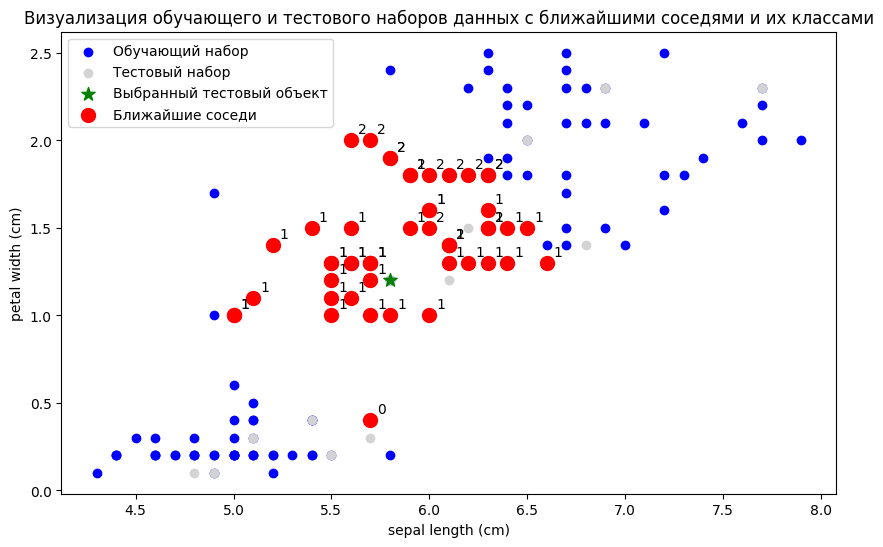

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    X_train['sepal length (cm)'],
    X_train['petal width (cm)'],
    color='blue',
    label='Обучающий набор'
)
plt.scatter(
    X_test['sepal length (cm)'],
    X_test['petal width (cm)'],
    color='lightgray',
    label='Тестовый набор'
)
plt.scatter(
    random_test_object['sepal length (cm)'],
    random_test_object['petal width (cm)'],
    c='g',
    marker='*',
    s=100,
    label='Выбранный тестовый объект'
)

for neighbor_index in k_neighbors:
    neighbor_values = X_train.iloc[neighbor_index]
    plt.scatter(
        neighbor_values['sepal length (cm)'],
        neighbor_values['petal width (cm)'],
        c='r',
        marker='o',
        s=100
    )

    plt.annotate(
        str(y_train[neighbor_index]),
        (neighbor_values['sepal length (cm)'],
        neighbor_values['petal width (cm)']),
        xytext=(5, 5),
        textcoords='offset points'
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Визуализация обучающего и тестового наборов данных с ближайшими соседями и их классами')
plt.legend(['Обучающий набор', 'Тестовый набор', 'Выбранный тестовый объект', 'Ближайшие соседи'])

plt.show()

### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_weighted.fit(X_train[['sepal length (cm)', 'petal width (cm)']], y_train)
y_pred_weighted = knn_weighted.predict(X_test[['sepal length (cm)', 'petal width (cm)']])


#### 2.2. Проверьте качество работы модели


In [58]:
# Оцениваем качество модели
accuracy_weighted = knn_weighted.score(X_test[['sepal length (cm)', 'petal width (cm)']], y_test)
print(f"Accuracy (взвешенный KNN): {accuracy_weighted:.2f}")


Accuracy (взвешенный KNN): 0.93


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [59]:
from sklearn.metrics import pairwise_distances

random_test_object = X_test.sample(n=1, random_state=42)
distances = pairwise_distances(random_test_object, X_train, metric='euclidean')


#### 2.4. Выберите топ  k  соседей


In [60]:
import numpy as np
k = 50
neighbor_indices = np.argsort(distances[0])
k_neighbors = neighbor_indices[1:k+1]
print(f"Индексы ближайших {k} соседей:", k_neighbors)


Индексы ближайших 50 соседей: [ 51 123  35   3  40  49 110   2 103  59 108 101 130  80  62  68  30  83
 105  78  94  37  54  26  77  60 125  88  31 128  74 126  57 104   0   6
  21  25  58  75  96  95 122  45 107  16  55  64  44 127]


#### 2.5. Рассчитайте вес для каждого соседа

In [62]:
k_neighbors
distances[0, k_neighbors]
k_neighbors_distances = distances[0, k_neighbors]
weights = 1 / k_neighbors_distances

#### 2.6. Выведите финальное предсказание для этого объекта

In [63]:
weighted_prediction = np.average(y_train[k_neighbors], weights=weights)
final_prediction = round(weighted_prediction)
print(f"Финальное предсказание: {final_prediction}")


Финальное предсказание: 1


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [64]:
print(f'Предсказанное вручную: {final_prediction}')
print(f'Предсказанное моделью: {knn_weighted.predict(random_test_object)[0]}')
print(f'Настоящее целевое значение: {y_train[random_test_object.index[0]]}')


Предсказанное вручную: 1
Предсказанное моделью: 1
Настоящее целевое значение: 0


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

In [65]:
from sklearn.metrics import pairwise_distances

def process_nearest_neighbors(test_object, k=50):
    distances = pairwise_distances(test_object, X_train, metric='euclidean')
    neighbor_indices = np.argsort(distances[0])
    k_neighbors = neighbor_indices[1:k+1]

    return k_neighbors


In [66]:
from ipywidgets import Output, IntSlider, VBox
from IPython.display import clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [67]:
def show_dist_plot(object_index:int=1, neighbors_count: int=1):
    test_object = X_train.iloc[object_index].to_frame().T
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_xlabel('sepal length (cm)')
    axes.set_ylabel('petal width (cm)')
    axes.set_title('Визуализация обучающего и тестового наборов данных с ближайшими соседями и их классами')
    axes.scatter(
        X_train['sepal length (cm)'],
        X_train['petal width (cm)'],
        color='blue',
        label='Обучающий набор'
    )
    axes.scatter(
        X_test['sepal length (cm)'],
        X_test['petal width (cm)'],
        color='lightgray',
        label='Тестовый набор'
    )
    axes.scatter(
        test_object['sepal length (cm)'],
        test_object['petal width (cm)'],
        c='g',
        marker='*',
        s=100,
        label='Выбранный тестовый объект'
    )
    k_neighbors = process_nearest_neighbors(test_object, neighbors_count)
    for neighbor_index in k_neighbors:
        neighbor_values = X_train.iloc[neighbor_index]
        axes.scatter(
            neighbor_values['sepal length (cm)'],
            neighbor_values['petal width (cm)'],
            c='r',
            marker='o',
            s=100
        )
        axes.annotate(
            str(y_train[neighbor_index]),
            (neighbor_values['sepal length (cm)'],
            neighbor_values['petal width (cm)']),
            xytext=(5, 5),
            textcoords='offset points'
        )
    fig.show()

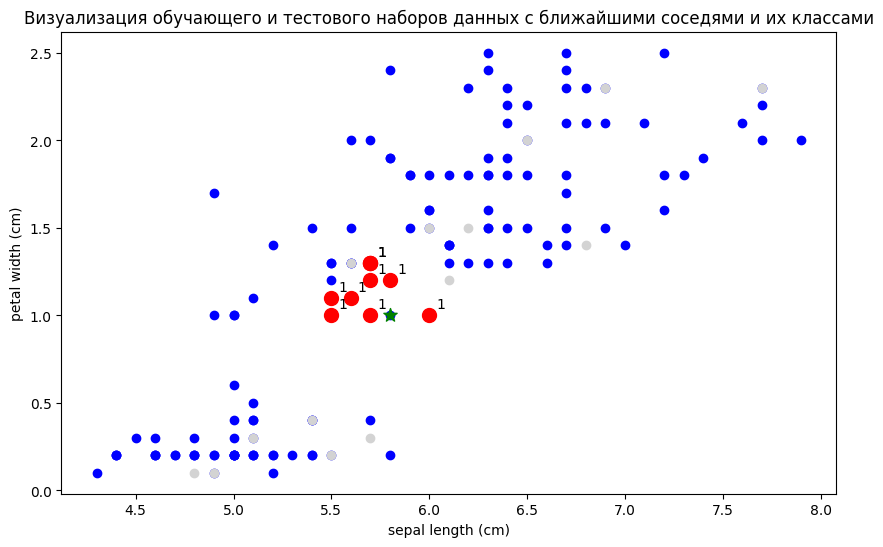

In [68]:
object_index = 40
neighbors_count = 10

show_dist_plot(object_index, neighbors_count)

### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [69]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


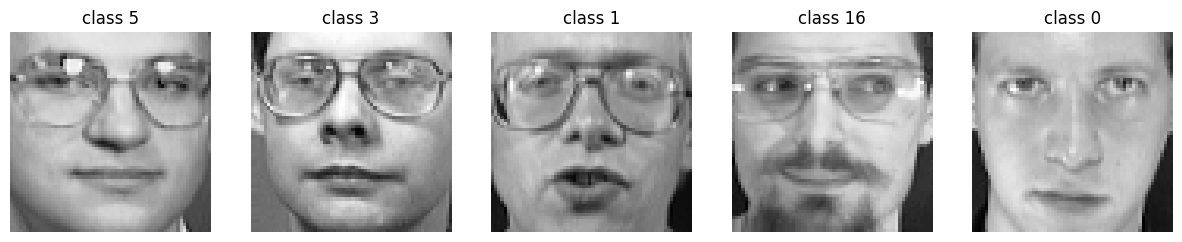

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [71]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3.1.2. Обучите модель KNN на 50 соседях

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=50)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [74]:
from sklearn.metrics import accuracy_score

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с 50 соседями: {accuracy:.2f}')


Точность модели KNN с 50 соседями: 0.30


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted_classifier = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn_weighted_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn_weighted_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с 50 соседями: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print('Отчет о классификации:')
print(class_report)


Точность модели KNN с 50 соседями: 0.54
Отчет о классификации:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       0.29      1.00      0.44         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       0.12      1.00      0.22         1
          16       0.00      0.00      0.00         1
          17       0.40      1.00      0.57         2
          18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

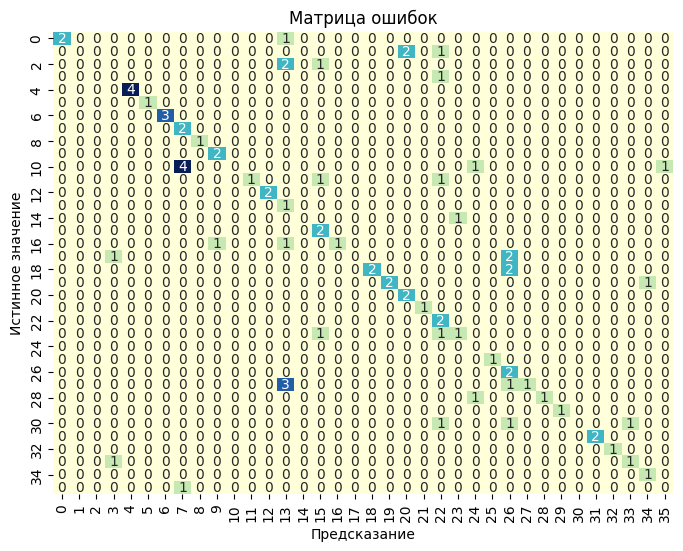

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [78]:
import numpy as np

def custom_distance_weight(distances):
    epsilon = 1e-6
    weights = 1.0 / (distances ** 2 + epsilon)
    return weights


#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_custom_weighted = KNeighborsClassifier(n_neighbors=50, weights=custom_distance_weight)
knn_custom_weighted.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50,
                     weights=<function custom_distance_weight at 0x78b625434f70>)

#### 3.3.3. Проверьте качество работы модели


In [80]:
y_pred_custom_weighted = knn_custom_weighted.predict(X_test)
accuracy_custom_weighted = accuracy_score(y_test, y_pred_custom_weighted)
print(f'Точность пользовательской модели KNN с весами: {accuracy_custom_weighted:.2f}')


Точность пользовательской модели KNN с весами: 0.66


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [81]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [83]:
X_subset = X[['MedInc']].iloc[:1000]


### Отрисуйте данные на графике

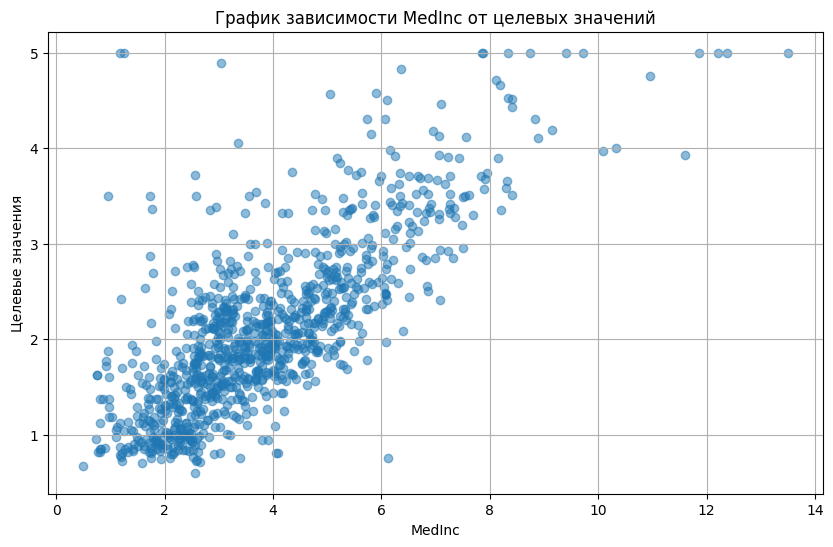

In [84]:
import matplotlib.pyplot as plt

# Извлекаем значения признака "MedInc" и целевых значений для первых 1000 строк
MedInc_values = X_subset['MedInc'].values
y_values = y[:1000]

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(MedInc_values, y_values, alpha=0.5)
plt.title('График зависимости MedInc от целевых значений')
plt.xlabel('MedInc')
plt.ylabel('Целевые значения')
plt.grid(True)
plt.show()


### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [85]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_subset, y[:1000], test_size=0.1, random_state=42)



#### 4.2. Обучите модель KNN на 100 соседях


In [86]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')


Среднеквадратичная ошибка (MSE): 0.28
Средняя абсолютная ошибка (MAE): 0.41


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [88]:
from sklearn.metrics import pairwise_distances

X_train_array = X_train.values
X_test_array = X_test.values

random_test_sample = X_test_array[np.random.randint(0, len(X_test_array))]

distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')
distances


array([[9.38900000e-01, 8.30900000e-01, 1.74070000e+00, 1.08270000e+00,
        1.21200000e-01, 3.56650000e+00, 4.68100000e-01, 1.06560000e+00,
        1.02580000e+00, 1.73930000e+00, 1.10000000e-01, 4.46000000e-01,
        2.29860000e+00, 9.42600000e-01, 2.36610000e+00, 2.36600000e-01,
        9.50200000e-01, 3.72600000e+00, 6.01300000e-01, 5.27000000e-02,
        2.41790000e+00, 9.38200000e-01, 1.00740000e+00, 1.96700000e-01,
        7.24100000e-01, 1.33100000e-01, 2.27630000e+00, 6.74700000e-01,
        3.21840000e+00, 8.62300000e-01, 1.75600000e-01, 1.99970000e+00,
        4.68100000e-01, 1.51930000e+00, 9.66700000e-01, 1.93180000e+00,
        2.61290000e+00, 5.46200000e-01, 9.39300000e-01, 1.59310000e+00,
        3.30600000e-01, 5.41600000e-01, 7.65900000e-01, 3.40960000e+00,
        1.32100000e+00, 1.69920000e+00, 4.69400000e-01, 9.52500000e-01,
        1.80000000e-02, 1.39520000e+00, 4.69400000e-01, 4.16490000e+00,
        7.60750000e+00, 8.48100000e-01, 1.73080000e+00, 1.596700

#### 4.5. Выберите топ  k  соседей


In [89]:
k = 5

k_nearest_indices = np.argsort(distances[0])[:k]

print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)


Индексы 5 ближайших соседей:
[211 664 729 872 246]


#### 4.6. Выведите финальное предсказание для этого объекта

In [90]:
k_nearest_targets = y_train[k_nearest_indices]

final_prediction = np.mean(k_nearest_targets)

print(f"Финальное предсказание для объекта: {final_prediction:.2f}")

Финальное предсказание для объекта: 2.50


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [91]:
knn_model_prediction = knn_regressor.predict([random_test_sample])[0]
final_prediction = np.mean(k_nearest_targets)
true_target_value = y_test[np.random.randint(0, len(X_test))]

print(f"Настоящее целевое значение: {true_target_value:.2f}")
print(f"Предсказание модели KNN: {knn_model_prediction:.2f}")
print(f"Финальное предсказание на основе KNN: {final_prediction:.2f}")

abs_error_model = np.abs(true_target_value - knn_model_prediction)
abs_error_final = np.abs(true_target_value - final_prediction)

print(f"Абсолютная ошибка модели KNN: {abs_error_model:.2f}")
print(f"Абсолютная ошибка финального предсказания: {abs_error_final:.2f}")


Настоящее целевое значение: 1.93
Предсказание модели KNN: 1.98
Финальное предсказание на основе KNN: 2.50
Абсолютная ошибка модели KNN: 0.05
Абсолютная ошибка финального предсказания: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

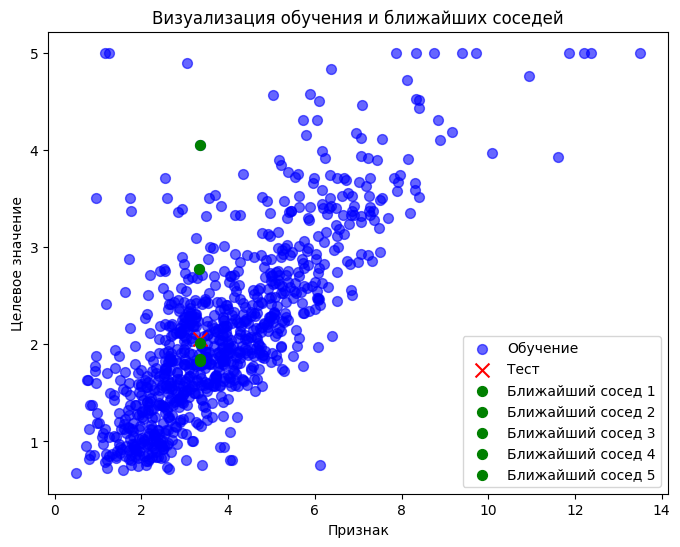

In [92]:
import matplotlib.pyplot as plt

k = 5
k_nearest_indices = np.argsort(distances)[:k]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train_array[:, 0],
    y_train,
    c='blue',
    label='Обучение',
    s=50,
    alpha=0.6
)
plt.scatter(
    random_test_sample[0],
    y_test[np.random.randint(0, len(X_test))],
    c='red',
    marker='x',
    s=100,
    label='Тест'
)

for i in range(k):
    plt.scatter(
        X_train_array[k_nearest_indices[0,i], 0],
        y_train[k_nearest_indices[0,i]],
        c='green',
        marker='o',
        s=50,
        label=f'Ближайший сосед {i+1}'
    )


# Добавим метки классов
plt.legend()
plt.xlabel('Признак')
plt.ylabel('Целевое значение')
plt.title('Визуализация обучения и ближайших соседей')
plt.show()



### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [93]:
from sklearn.neighbors import KNeighborsRegressor

k_neighbors = 10
weighted_knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors, weights='distance')
weighted_knn_regressor.fit(X_train, y_train)
y_pred_weighted_knn = weighted_knn_regressor.predict(X_test)


#### 5.2. Проверьте качество работы модели


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = weighted_knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_weighted_knn)

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Коэффициент детерминации (R^2): {r2:.2f}')


Среднеквадратичная ошибка (MSE): 0.42
Средняя абсолютная ошибка (MAE): 0.51
Коэффициент детерминации (R^2): 0.43


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [95]:
distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')
print("Расстояния до всех объектов обучения:")
print(distances)


Расстояния до всех объектов обучения:
[[9.38900000e-01 8.30900000e-01 1.74070000e+00 1.08270000e+00
  1.21200000e-01 3.56650000e+00 4.68100000e-01 1.06560000e+00
  1.02580000e+00 1.73930000e+00 1.10000000e-01 4.46000000e-01
  2.29860000e+00 9.42600000e-01 2.36610000e+00 2.36600000e-01
  9.50200000e-01 3.72600000e+00 6.01300000e-01 5.27000000e-02
  2.41790000e+00 9.38200000e-01 1.00740000e+00 1.96700000e-01
  7.24100000e-01 1.33100000e-01 2.27630000e+00 6.74700000e-01
  3.21840000e+00 8.62300000e-01 1.75600000e-01 1.99970000e+00
  4.68100000e-01 1.51930000e+00 9.66700000e-01 1.93180000e+00
  2.61290000e+00 5.46200000e-01 9.39300000e-01 1.59310000e+00
  3.30600000e-01 5.41600000e-01 7.65900000e-01 3.40960000e+00
  1.32100000e+00 1.69920000e+00 4.69400000e-01 9.52500000e-01
  1.80000000e-02 1.39520000e+00 4.69400000e-01 4.16490000e+00
  7.60750000e+00 8.48100000e-01 1.73080000e+00 1.59670000e+00
  1.28750000e+00 6.96700000e-01 4.98000000e-02 1.29180000e+00
  1.48060000e+00 5.22800000e-01 

#### 5.4. Выберите топ  k  соседей


In [96]:
k = 5
k_nearest_indices = np.argsort(distances[0])[:k]

print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)



Индексы 5 ближайших соседей:
[211 664 729 872 246]


#### 5.5. Рассчитайте вес для каждого соседа

In [97]:
weights = 1 / distances[0][k_nearest_indices]

print(f"Веса для {k} ближайших соседей:")
print(weights)



Веса для 5 ближайших соседей:
[1428.57142644  212.76595744  208.33333333  102.04081633   71.42857143]


#### 5.6. Выведите финальное предсказание для этого объекта

In [98]:
neighbor_targets = y_train[k_nearest_indices]
final_prediction = np.sum(neighbor_targets * weights) / np.sum(weights)
print(f"Финальное предсказание для объекта: {final_prediction}")

Финальное предсказание для объекта: 2.086120449359055


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [99]:
knn_model_prediction = weighted_knn_regressor.predict([random_test_sample])[0]
final_prediction = np.mean(k_nearest_targets)
true_target_value = y_test[np.random.randint(0, len(X_test))]

print(f"Настоящее целевое значение: {true_target_value:.2f}")
print(f"Предсказание модели KNN: {knn_model_prediction:.2f}")
print(f"Финальное предсказание на основе KNN: {final_prediction:.2f}")

abs_error_model = np.abs(true_target_value - knn_model_prediction)
abs_error_final = np.abs(true_target_value - final_prediction)

print(f"Абсолютная ошибка модели KNN: {abs_error_model:.2f}")
print(f"Абсолютная ошибка финального предсказания: {abs_error_final:.2f}")


Настоящее целевое значение: 1.39
Предсказание модели KNN: 2.05
Финальное предсказание на основе KNN: 2.50
Абсолютная ошибка модели KNN: 0.66
Абсолютная ошибка финального предсказания: 1.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

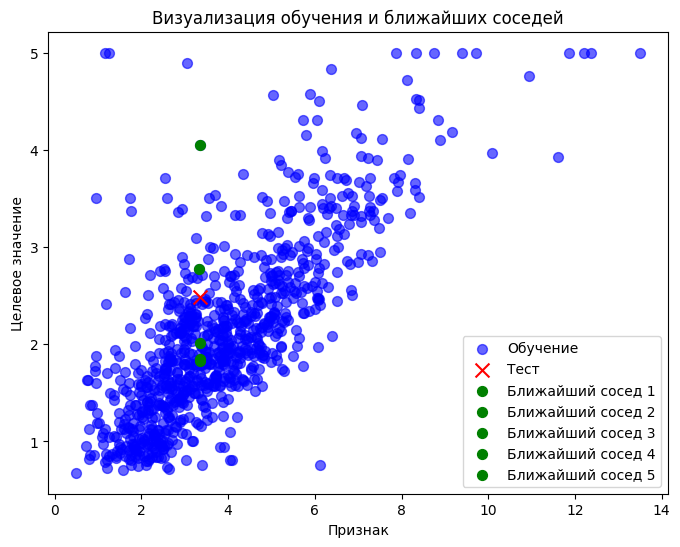

In [100]:
import matplotlib.pyplot as plt

k = 5
k_nearest_indices = np.argsort(distances)[:k]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train_array[:, 0],
    y_train,
    c='blue',
    label='Обучение',
    s=50,
    alpha=0.6
)
plt.scatter(
    random_test_sample[0],
    y_test[np.random.randint(0, len(X_test))],
    c='red',
    marker='x',
    s=100,
    label='Тест'
)

for i in range(k):
    plt.scatter(
        X_train_array[k_nearest_indices[0,i], 0],
        y_train[k_nearest_indices[0,i]],
        c='green',
        marker='o',
        s=50,
        label=f'Ближайший сосед {i+1}'
    )


# Добавим метки классов
plt.legend()
plt.xlabel('Признак')
plt.ylabel('Целевое значение')
plt.title('Визуализация обучения и ближайших соседей')
plt.show()


## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [101]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [102]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

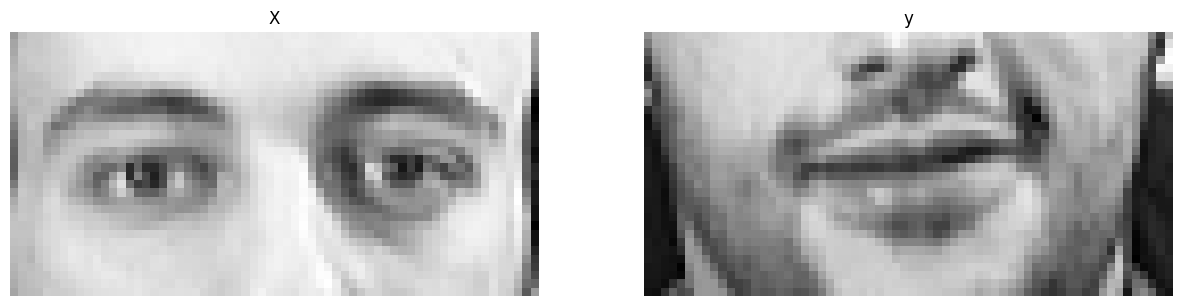

In [103]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [104]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [105]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_test['knn'] = knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')


Среднеквадратичная ошибка (MSE): 0.02
Средняя абсолютная ошибка (MAE): 0.10


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [107]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test['weighted_knn'] = weighted_knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])
r2 = r2_score(y_test, pred_test['knn'])

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')


MSE: 0.02
MAE: 0.10
R^2: 0.21


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [109]:
import numpy as np

def custom_distance_weight(distances):
    epsilon = 1e-6
    weights = 1.0 / (distances ** 2 + epsilon)
    return weights


#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [110]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn_custom = KNeighborsRegressor(n_neighbors=100, weights=custom_distance_weight)
weighted_knn_custom.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_distance_weight at 0x78b6249bc700>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test['weighted_knn_custom'] = weighted_knn.predict(X_test)

r2 = r2_score(y_test, pred_test['weighted_knn_custom'])

print(f'Коэффициент детерминации (R^2): {r2:.2f}')


Коэффициент детерминации (R^2): 0.24


А сейчас отрисуем все предсказания.

In [112]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

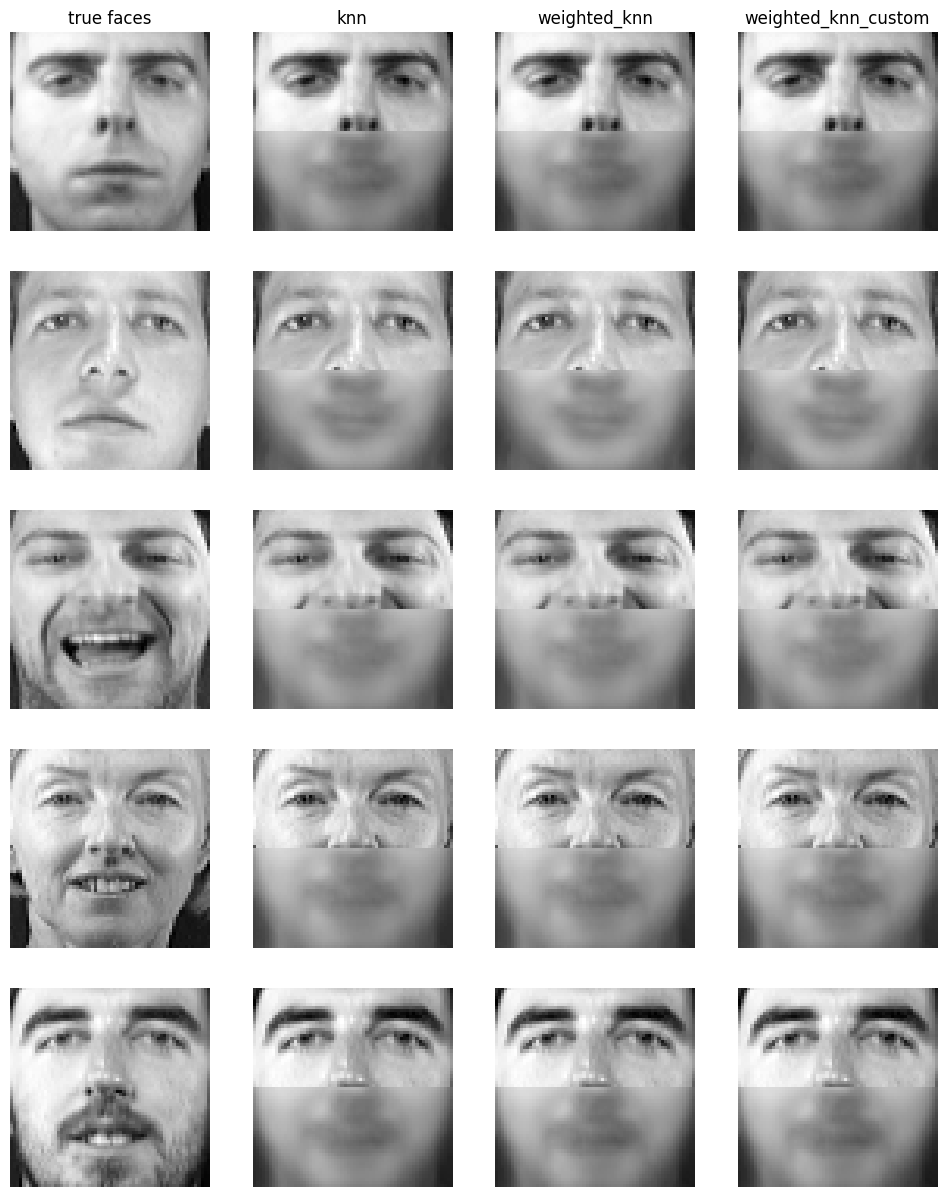

In [113]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, предыдущей работе, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [ ]:
# Ваш код здесь